In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

In [2]:
df = pd.read_csv("/kaggle/input/interview-selection-dataset/Data - Base.csv")
df.shape

(21256, 52)

In [3]:
# df.info()

In [4]:
# df.isna().sum()

In [5]:
df.columns = df.columns.str.strip()\
    .str.replace(r"[\/\?\*\-\\.,]", "", regex=True)\
    .str.replace(" ", "_")\
    .str.lower()

In [6]:
df.columns

Index(['name', 'age', 'gender', 'type_of_graduationpost_graduation',
       'marital_status', 'mode_of_interview_given_by_candidate',
       'pre_interview_check', 'fluency_in_english_based_on_introduction',
       'confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario',
       'does_the_candidate_has_mother_tongue_influence_while_speaking_english',
       'has_acquaintance_in_company_and_has_spoken_to_himher_before_applying',
       'candidate_status', 'last_fixed_ctc_(lakhs)', 'currently_employed',
       'experienced_candidate__(experience_in_months)'

In [7]:
df.rename(columns={'does_the_candidate_has_mother_tongue_influence_while_speaking_english': 'mother_tongue_influence',
                   'has_acquaintance_in_company_and_has_spoken_to_himher_before_applying' : 'has_acquaintance_in_company',
                   "but_my_child's_exam_are_going_on_now_so_we_will_keep_the_counselling_session_after_the_exams_get_over(time:_favourable_pitch:_counsellor_hype)" : "father_reply",
                   "sir_being_in_education_industry_i_know_this_is_a_marketing_gimmick_and_at_the_end_of_the_day_you'll_be_selling_the_app": "being_in_education_industry_be_selling_the_app",
                  }, inplace=True)

In [8]:
# df.info()

In [9]:
df.shape

(21256, 52)

In [10]:
df = df.drop(columns='name')
df.shape

(21256, 51)

In [11]:
df.head()

,age,gender,type_of_graduationpost_graduation,marital_status,mode_of_interview_given_by_candidate,pre_interview_check,fluency_in_english_based_on_introduction,confidence_based_on_introduction_(english),confidence_based_on_the_topic_given,confidence_based_on_the_ppt_question,...,structured_thinking_based_on_the_ppt_question1,structured_thinking(_call_pitch)1,regional_fluency_based_on_the_topic_given__1,regional_fluency_based_on_the_ppt_question1,regional_fluency_based_on_the__sales_scenario1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,whether_joined_the_company_or_not
0,25,Female,Masters in data science,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,...,3,2,1,1.0,1.0,11,7,3,42,No
1,29,Female,BSc or MSc,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,No
2,27,Female,B.E / B-Tech,Unmarried,Mobile,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,3,3,3,1.0,3.0,10,9,7,52,Yes
3,22,Male,B.E / B-Tech,Unmarried,Laptop,Proceed with the Interview,Able to speak sentences in a clear/coherent wa...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,Impactful - Good confidence throughout the Int...,...,3,3,3,3.0,3.0,12,9,9,60,Yes
4,22,Male,BA/MA,Unmarried,Mobile,Proceed with the Interview,Taking gaps while speaking due to lack of cont...,Guarded Confidence - Confident in some areas a...,Impactful - Good confidence throughout the Int...,Guarded Confidence - Confident in some areas a...,...,2,1,3,1.0,3.0,10,5,7,44,Not Joined


In [12]:
columns_to_drop = df.columns[7:17]
print("Dropping the following columns:")
print(columns_to_drop)

Dropping the following columns:
Index(['confidence_based_on_introduction_(english)',
       'confidence_based_on_the_topic_given',
       'confidence_based_on_the_ppt_question',
       'confidence_based_on_the_sales_scenario',
       'structured_thinking_(in_regional_only)',
       'structured_thinking_based_on_the_ppt_question',
       'structured_thinking(_call_pitch)',
       'regional_fluency_based_on_the_topic_given',
       'regional_fluency_based_on_the_ppt_question',
       'regional_fluency_based_on_the__sales_scenario'],
      dtype='object')


In [13]:
# Dropping the columns
df = df.drop(columns=columns_to_drop)
df.shape

(21256, 41)

In [14]:
df.duplicated().sum()

355

In [15]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [16]:
df.shape

(20901, 41)

In [17]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [18]:
df.shape

(18681, 41)

In [19]:
df.duplicated().sum()

0

In [20]:
# df.isna().sum()

In [21]:
df['whether_joined_the_company_or_not'] = df['whether_joined_the_company_or_not'].map({'Joined': 1, 'Yes':1, 'No':0, 'Not Joined': 0})

In [22]:
df['age'].value_counts().sort_index()

age
20      445
21     1747
22     3605
23     3037
24     2689
25     1895
26     1523
27     1154
28      908
29      651
30      522
31      363
32      121
32+      21
Name: count, dtype: int64

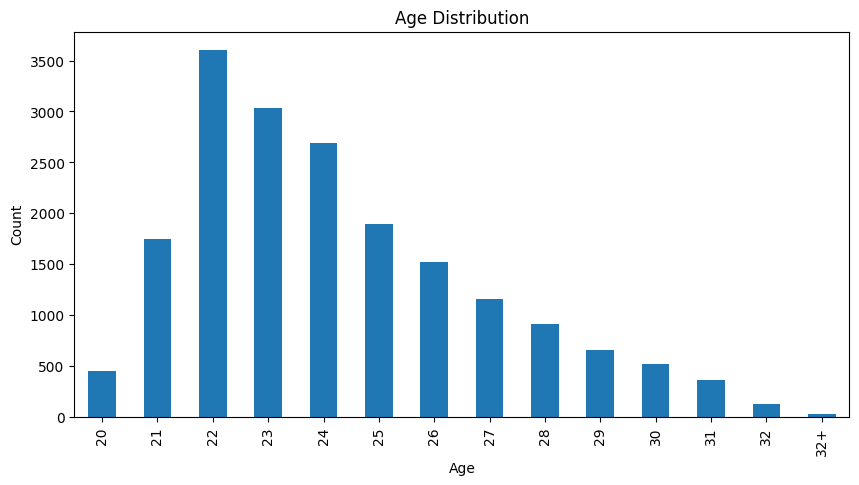

In [23]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [24]:
# Convert to int
df['age'] = df['age'].replace('32+', '32').astype(int)

In [25]:
bins = [0, 19, 21, 24, 27, 30, 32, float('inf')]
labels = ['0-19', '20-21', '22-24', '25-27', '28-30', '31-60', '60+']
df['age'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

In [26]:
df['age'].unique()

['25-27', '28-30', '22-24', '20-21', '31-60']
Categories (7, object): ['0-19' < '20-21' < '22-24' < '25-27' < '28-30' < '31-60' < '60+']

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


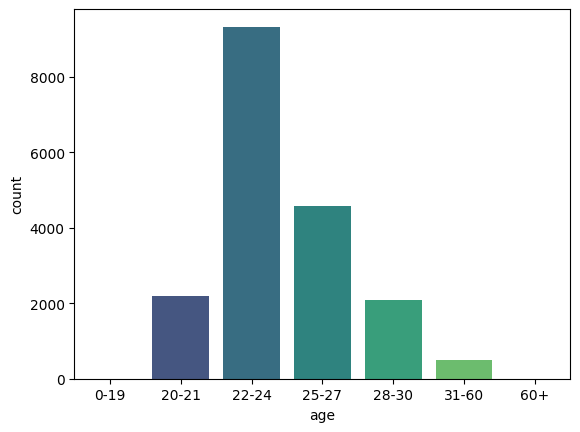

In [27]:
sns.countplot(x=df['age'], palette="viridis", order=labels)
plt.show()

In [28]:
df['age'] = df['age'].cat.codes

In [29]:
df['age'].unique()

array([3, 4, 2, 1, 5], dtype=int8)

In [30]:
df['type_of_graduationpost_graduation'] = df['type_of_graduationpost_graduation'].str.lower() #-------------------------------------------------------------------------------

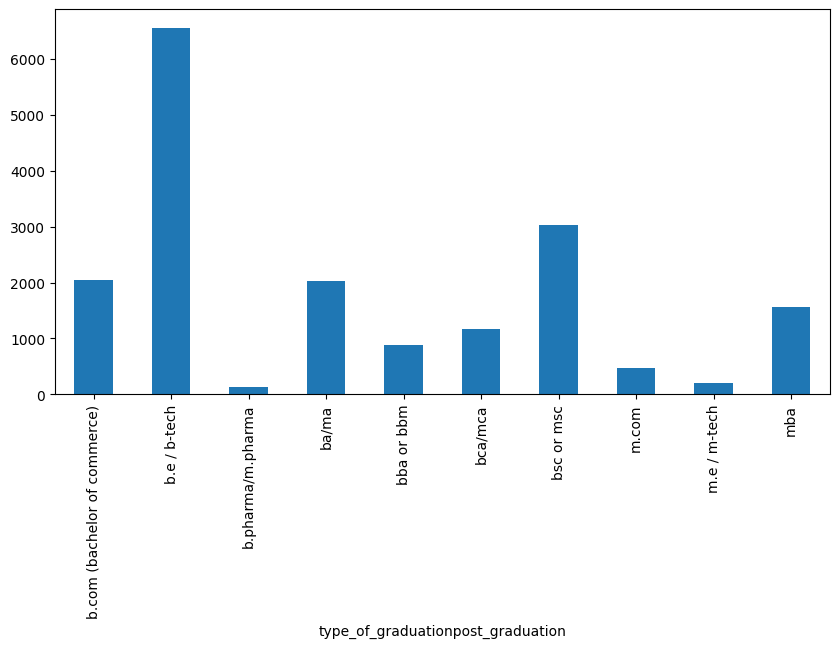

In [31]:
df['type_of_graduationpost_graduation'].value_counts().head(10).sort_index().plot(kind='bar', figsize=(10,5))
plt.show()

In [32]:
# df['type_of_graduationpost_graduation'].unique()

In [33]:
df["type_of_graduationpost_graduation"].value_counts().head(20)

type_of_graduationpost_graduation
b.e / b-tech                       6551
bsc or msc                         3019
b.com (bachelor of commerce)       2044
ba/ma                              2033
mba                                1571
bca/mca                            1166
bba or bbm                          879
m.com                               468
m.e / m-tech                        211
b.pharma/m.pharma                   141
b.ed(teaching)                      137
hotel management                     69
b.comm (bachelor of mass comm.)      68
pgdm                                 43
bms                                  16
pgdca                                13
msw                                  12
bvoc                                  9
bcom computers                        6
bcs                                   5
Name: count, dtype: int64

In [34]:
# degree_mapping = {
#     # Engineering & Technology
#     'b.e / b-tech': 'Engineering & Technology',
#     'm.e / m-tech': 'Engineering & Technology',
    
#     # Science & Mathematics
#     'bsc or msc': 'Science & Mathematics',
#     'bca/mca': 'Science & Mathematics',
#     'bcs': 'Science & Mathematics',
    
#     # Commerce & Business
#     'b.com (bachelor of commerce)': 'Commerce & Business',
#     'm.com': 'Commerce & Business',
#     'bba or bbm': 'Commerce & Business',
#     'mba': 'Commerce & Business',
#     'pgdm': 'Commerce & Business',
#     'bcom computers': 'Commerce & Business',

#     # Arts & Humanities
#     'ba/ma': 'Arts & Humanities',
#     'b.ed(teaching)': 'Arts & Humanities',
#     'msw': 'Arts & Humanities',

#     # Mass Communication & Media
#     'b.comm (bachelor of mass comm.)': 'Mass Communication & Media',

#     # Pharmacy & Medical
#     'b.pharma/m.pharma': 'Pharmacy & Medical',

#     # Hotel Management & Vocational Studies
#     'hotel management': 'Hotel Management & Vocational Studies',
#     'bvoc': 'Hotel Management & Vocational Studies',

#     # Diplomas & Specialized Courses
#     'pgdca': 'Diplomas & Specialized Courses',
#     'bms': 'Diplomas & Specialized Courses'
# }


# df['type_of_graduationpost_graduation'] = df['type_of_graduationpost_graduation'].map(degree_mapping).fillna('Other')

In [35]:
df['type_of_graduationpost_graduation'].value_counts()

type_of_graduationpost_graduation
b.e / b-tech                    6551
bsc or msc                      3019
b.com (bachelor of commerce)    2044
ba/ma                           2033
mba                             1571
                                ... 
bsc bedd - computer science        1
masters of social work             1
masters in fashion designing       1
msw-hr-2014                        1
bsc agri                           1
Name: count, Length: 206, dtype: int64

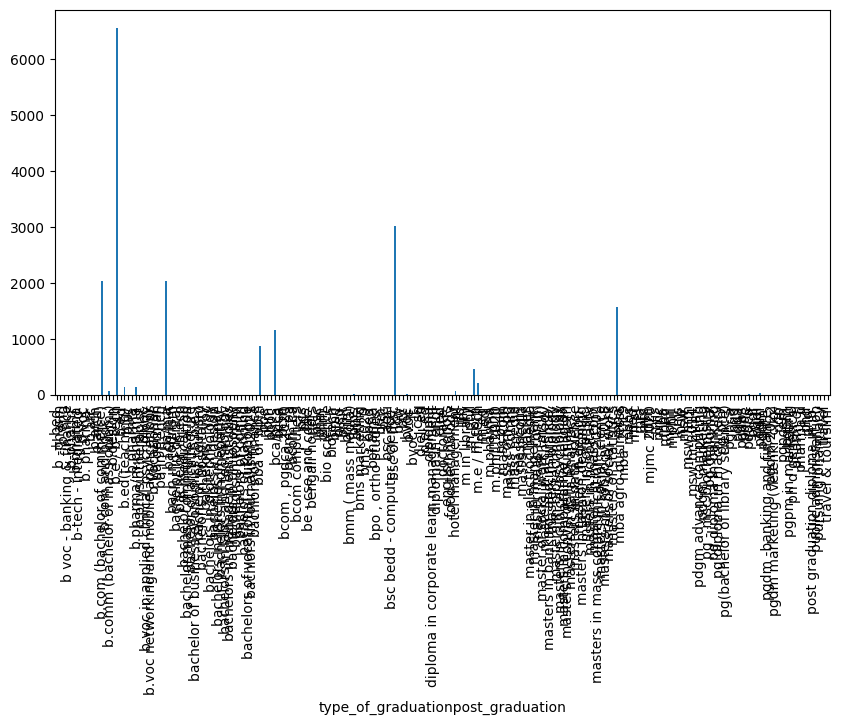

In [36]:
df['type_of_graduationpost_graduation'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.show()

In [37]:
df["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [38]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [39]:
df = pd.get_dummies(df, columns=['marital_status'])

In [40]:
df['mode_of_interview_given_by_candidate'].value_counts()

mode_of_interview_given_by_candidate
Mobile    14039
Laptop     4642
Name: count, dtype: int64

In [41]:
df = pd.get_dummies(df, columns=['mode_of_interview_given_by_candidate'])

In [42]:
df['pre_interview_check'].value_counts()

pre_interview_check
Proceed with the Interview    18678
Option 4                          2
I                                 1
Name: count, dtype: int64

In [43]:
df.drop(columns=['pre_interview_check'], inplace=True)

In [44]:
df['fluency_in_english_based_on_introduction'].unique()

array(['Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups.',
       'Taking gaps while speaking due to lack of content but does not stammer or stutter',
       'Trying but Not Able to speak clearly & Fumbles a lot',
       'Natural Stutter and Stammer'], dtype=object)

In [45]:
# Define ordinal mapping
fluency_mapping = {
    'Trying but Not Able to speak clearly & Fumbles a lot': 0,
    'Taking gaps while speaking due to lack of content but does not stammer or stutter': 1,
    'Natural Stutter and Stammer': 2,
    'Able to speak sentences in a clear/coherent way. Smooth talker with one or two hiccups.': 3
}

# Apply mapping
df['fluency_in_english_based_on_introduction'] = df['fluency_in_english_based_on_introduction'].map(fluency_mapping)

In [46]:
df['fluency_in_english_based_on_introduction'].unique()

array([3, 1, 0, 2])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 43 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   age                                                     18681 non-null  int8   
 1   gender                                                  18681 non-null  int64  
 2   type_of_graduationpost_graduation                       18681 non-null  object 
 3   fluency_in_english_based_on_introduction                18681 non-null  int64  
 4   mother_tongue_influence                                 18681 non-null  object 
 5   has_acquaintance_in_company                             18681 non-null  object 
 6   candidate_status                                        18681 non-null  object 
 7   last_fixed_ctc_(lakhs)                                  18681 non-null  object 
 8   currently_employed                  

In [48]:
df['mother_tongue_influence'].unique()

array(['No', 'Yes'], dtype=object)

In [49]:
df['mother_tongue_influence'] = df['mother_tongue_influence'].map({'No':0, 'Yes':1})

In [50]:
df['has_acquaintance_in_company'].unique()

array(['No', 'Yes'], dtype=object)

In [51]:
df['has_acquaintance_in_company'] = df['has_acquaintance_in_company'].map({'Yes': 1, 'No': 0})
df['has_acquaintance_in_company'].unique()

array([0, 1])

In [52]:
df['candidate_status'].value_counts()

candidate_status
Fresher(only 2022 grad)                                             8591
Lateral(2021 and before with (less than 6 months) experience)       3639
Experienced in client facing(equal to or more than 6 months)        3429
Experienced in non client facing(equal to or more than 6 months)    3022
Name: count, dtype: int64

In [53]:
df = pd.get_dummies(df, columns=['candidate_status'])

In [54]:
df.shape

(18681, 46)

In [55]:
df['last_fixed_ctc_(lakhs)'].unique()

array(['5-5.99', 'Fresher', '2-2.99', '3-3.99', '4-4.99', '0-1.99', '7+',
       '6-6.99'], dtype=object)

In [56]:
df['last_fixed_ctc_(lakhs)'].value_counts()

last_fixed_ctc_(lakhs)
Fresher    11898
2-2.99      2720
3-3.99      1702
0-1.99      1371
4-4.99       660
5-5.99       201
6-6.99        72
7+            57
Name: count, dtype: int64

In [57]:
ctc_mapping = {'Fresher': 0,
               '0-1.99': 1,
               '2-2.99': 2.5,
               '3-3.99': 3.5,
               '4-4.99': 4.5,
               '5-5.99': 5.5,
               '6-6.99': 6.5,
               '7+': 7
              }
df['last_fixed_ctc_(lakhs)'] = df['last_fixed_ctc_(lakhs)'].map(ctc_mapping)

In [58]:
df['last_fixed_ctc_(lakhs)'].value_counts()

last_fixed_ctc_(lakhs)
0.0    11898
2.5     2720
3.5     1702
1.0     1371
4.5      660
5.5      201
6.5       72
7.0       57
Name: count, dtype: int64

In [59]:
df['currently_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [60]:
df['currently_employed'] = df['currently_employed'].map({'Yes': 1, 'No': 0})
df['currently_employed'].unique()

array([0, 1])

In [61]:
df['experienced_candidate__(experience_in_months)'].unique()

array(['6-11.99 Months', 'Fresher(<6 months)', '12-17.99 Months',
       '48+ Months', '24-29.99 Months', '18-23.99 Months',
       '36-47.99 Months', '30-35.99 Months'], dtype=object)

In [62]:
df['experienced_candidate__(experience_in_months)'].value_counts()

experienced_candidate__(experience_in_months)
Fresher(<6 months)    12161
6-11.99 Months         1365
48+ Months             1331
12-17.99 Months        1229
24-29.99 Months         817
18-23.99 Months         777
36-47.99 Months         571
30-35.99 Months         430
Name: count, dtype: int64

In [63]:
# Define mapping dictionary
experience_mapping = {
    'Fresher(<6 months)': 0,
    '6-11.99 Months': 1,
    '12-17.99 Months': 2,
    '18-23.99 Months': 3,
    '24-29.99 Months': 4,
    '30-35.99 Months': 5,
    '36-47.99 Months': 6,
    '48+ Months': 7
}

# Apply mapping to the DataFrame
df['experienced_candidate__(experience_in_months)'] = df['experienced_candidate__(experience_in_months)'].map(experience_mapping)
df['experienced_candidate__(experience_in_months)'].value_counts()

experienced_candidate__(experience_in_months)
0    12161
1     1365
7     1331
2     1229
4      817
3      777
6      571
5      430
Name: count, dtype: int64

In [64]:
df['experienced_candidate_(nature_of_work)'] = df['experienced_candidate_(nature_of_work)'].str.lower()

In [65]:
df['experienced_candidate_(nature_of_work)'].value_counts().head(50) ################################################################################

experienced_candidate_(nature_of_work)
fresher(<6 months)                                          12070
sales numbers                                                1946
working hours                                                 749
call time                                                     286
no targets                                                    187
customer visits                                               170
teaching                                                      129
no targets                                                    119
call time, sales numbers, customer visits, working hours      102
sales numbers, customer visits                                 99
call time, sales numbers                                       78
non target                                                     76
operations                                                     58
core                                                           58
teaching                             

In [66]:
df['what_was_the_type_of_role'].unique()

array(['Fresher', 'Individual Contributor', 'Team Handling'], dtype=object)

In [67]:
role_mapping = {'Fresher': 0,
                'Individual Contributor': 1,
                'Team Handling': 2
               }
df['what_was_the_type_of_role'] = df['what_was_the_type_of_role'].map(role_mapping)
df['what_was_the_type_of_role'].unique()

array([0, 1, 2])

In [68]:
#how_many_slides_candidate_have_submitted_in_ppt

In [69]:
df['how_many_slides_candidate_have_submitted_in_ppt'].value_counts()

how_many_slides_candidate_have_submitted_in_ppt
2 - 3 slides                                                        10909
4 - 5 slides                                                         4006
Only Name Slide/No Slide Attached (Blank/Template PPT Submitted)     1061
1 slide                                                               684
Wrong File/PPT Submitted                                              680
More than 6 slides                                                    671
5 - 6 slides                                                          643
No slides or Wrong PPT submitted                                       27
Name: count, dtype: int64

In [70]:
slide_mapping = {
    'Only Name Slide/No Slide Attached (Blank/Template PPT Submitted)': 0,
    'No slides or Wrong PPT submitted': 0,
    'Wrong File/PPT Submitted': 0,
    '1 slide': 1,
    '2 - 3 slides': 2,
    '4 - 5 slides': 3,
    '5 - 6 slides': 4,
    'More than 6 slides': 5
}

df['how_many_slides_candidate_have_submitted_in_ppt'] = df['how_many_slides_candidate_have_submitted_in_ppt'].map(slide_mapping)
df['how_many_slides_candidate_have_submitted_in_ppt'].value_counts()

how_many_slides_candidate_have_submitted_in_ppt
2    10909
3     4006
0     1768
1      684
5      671
4      643
Name: count, dtype: int64

In [71]:
# df['callpitch_elements_used_during_the_call_sales_scenario'].unique()#######################################################################################################

In [72]:
df['father_reply'].value_counts()###############################################################################################################################################

father_reply
None of the above                                                                                                        5936
Urgency using situation                                                                                                  4022
Urgency using Time                                                                                                       2981
Did not answer                                                                                                           1485
Asking Questions                                                                                                         1012
Urgency using Time, Urgency using situation                                                                               940
Urgency by creating counsellor Hype                                                                                       922
Urgency by creating counsellor Hype, Urgency using situation                                             

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 46 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   age                                                                                18681 non-null  int8   
 1   gender                                                                             18681 non-null  int64  
 2   type_of_graduationpost_graduation                                                  18681 non-null  object 
 3   fluency_in_english_based_on_introduction                                           18681 non-null  int64  
 4   mother_tongue_influence                                                            18681 non-null  int64  
 5   has_acquaintance_in_company                                                        18681 non-null  int

In [74]:
df['let_me_discuss_it_with_my_child'].unique()

array(['None of the above',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it.',
       "Anticipation of objection from child's end:", 'Did not answer',
       'None of the above, Did not answer',
       "Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., Anticipation of objection from child's end:",
       'Asking questions:',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., None of the above',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., Asking questions:',
       'Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it., Did not answer',
       "Asking questions:, Anticipation of objection from child's end:",
       'Asking questions:, None of the above',

In [75]:
df['let_me_discuss_it_with_my_child'].nunique()

17

In [76]:
df['let_me_discuss_it_with_my_child'].value_counts()

let_me_discuss_it_with_my_child
None of the above                                                                                                                                                                  8638
Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it.                                                                    3596
Did not answer                                                                                                                                                                     2587
Asking questions:                                                                                                                                                                  2187
Anticipation of objection from child's end:                                                                                                                                         902
Decision Making: Major decision of child future/

In [77]:
# # Define categories
# options = [
#     "None of the above",
#     "Did not answer",
#     "Decision Making: Major decision of child future/study is taken by parents as parents know the importance of it.",
#     "Asking questions",
#     "Anticipation of objection from child's end"
# ]

# # Create binary columns for each option
# for option in options:
#     df[option] = df['let_me_discuss_it_with_my_child'].apply(lambda x: 1 if option in str(x) else 0)

# # Drop the original column
# df.drop(columns=['let_me_discuss_it_with_my_child'], inplace=True)

# # Display transformed DataFrame
# df.head()


In [78]:
df['being_in_education_industry_be_selling_the_app'].unique()##############################################################################################################

array(['None of the above', 'Non chargeable session',
       'Value creation(Nothing comes for free)', 'Did not answer',
       'User Base(Stats)', 'None of the above, Did not answer',
       'User Base(Stats), Value creation(Nothing comes for free)',
       'Non chargeable session, Value creation(Nothing comes for free)',
       'Non chargeable session, Talking about Scholarship',
       '15 days trial', 'Talking about Scholarship',
       'Non chargeable session, Value creation(Nothing comes for free), 15 days trial',
       'Non chargeable session, 15 days trial',
       'Non chargeable session, User Base(Stats)',
       'User Base(Stats), 15 days trial',
       'Non chargeable session, User Base(Stats), Value creation(Nothing comes for free)',
       'Talking about Scholarship, Value creation(Nothing comes for free)',
       'Non chargeable session, User Base(Stats), Value creation(Nothing comes for free), 15 days trial',
       'User Base(Stats), None of the above',
       'Value 

In [79]:
print("Count of unique values:", df['being_in_education_industry_be_selling_the_app'].nunique())

Count of unique values: 43


In [80]:
df['role_acceptance'].unique()

array(['Yes : Think and says yes.(Shows some hesitation)', 'Emphatic Yes',
       'No'], dtype=object)

In [81]:
df['role_acceptance'].value_counts()

role_acceptance
Emphatic Yes                                        12456
Yes : Think and says yes.(Shows some hesitation)     5475
No                                                    750
Name: count, dtype: int64

In [82]:
df = pd.get_dummies(df, columns=['role_acceptance'])

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 48 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   age                                                                                18681 non-null  int8   
 1   gender                                                                             18681 non-null  int64  
 2   type_of_graduationpost_graduation                                                  18681 non-null  object 
 3   fluency_in_english_based_on_introduction                                           18681 non-null  int64  
 4   mother_tongue_influence                                                            18681 non-null  int64  
 5   has_acquaintance_in_company                                                        18681 non-null  int

In [84]:
df['interview_verdict'].value_counts().head(10)

interview_verdict
Select               9591
Reject               4247
Borderline Select    3497
Premium Select       1196
Borderline Reject     150
Name: count, dtype: int64

In [85]:
verdict_mapping = {
    'Reject': 0,
    'Borderline Reject': 1,
    'Borderline Select': 2,
    'Select': 3,
    'Premium Select': 4
}

df['interview_verdict'] = df['interview_verdict'].map(verdict_mapping)
df['interview_verdict'].value_counts()

interview_verdict
3    9591
0    4247
2    3497
4    1196
1     150
Name: count, dtype: int64

In [86]:
df['candidate_is_willing_to_relocate'].unique()

array(['Yes - Anywhere Within a City', 'Yes - Anywhere in PAN India',
       'No - Want Specific Centre Location Only',
       'Yes - Anywhere Within a State'], dtype=object)

In [87]:
# Define ordinal mapping
relocation_mapping = {
    'No - Want Specific Centre Location Only': 0,
    'Yes - Anywhere Within a City': 1,
    'Yes - Anywhere Within a State': 2,
    'Yes - Anywhere in PAN India': 3
}

# Apply mapping
df['candidate_is_willing_to_relocate'] = df['candidate_is_willing_to_relocate'].map(relocation_mapping)
df['candidate_is_willing_to_relocate'].unique()

array([1, 3, 0, 2])

In [88]:
df['role_location_to_be_given_to_the_candidate'].unique()

array(['Bangalore', 'Delhi ', 'Chennai ', 'Pune ', 'Kolkata ', 'Indore ',
       'Hyderabad ', 'Inbound Bangalore', 'Coimbator ', 'Bangalore ',
       'Shimoga ', 'Shivamoga ', 'Ranchi ', 'Karnal ', 'Bhagalpur ',
       'Coimbatore ', 'Muzaffarpur ', 'Nagpur ', 'Bareilly ',
       'Mangalore ', 'Surat ', 'Bengaluru ', 'Kanpur ', 'Dhanbad ',
       'Bellary ', 'Kollam ', 'Gaya ', 'Ghaziabad ', 'Kochi ',
       'Thrissur ', 'Patna ', 'Agra ', 'Ahmedabad ', 'Noida ', 'Gurgaon ',
       'Anand ', 'Cuttack ', 'Saharanpur ', 'Bikaner ', 'Salem ',
       'Jaipur ', 'Bhubaneswar ', 'Udaipur ', 'Lucknow ', 'Rewa ',
       'Gwalior ', 'Kurnool ', 'Bhopal ', 'Jamnagar ', 'Aurangabad ',
       'Sikar ', 'Mumbai ', 'Ludhiana ', 'Aligarh ', 'Mathura ',
       'Jabalpur ', 'Calicut ', 'Vizag ', 'Dharwad ', 'Ujjain ',
       'Meerut ', 'Hubli ', 'Hassan ', 'Gulbarga ', 'Kozhikode ',
       'Tirupati ', 'Darbhanga ', 'Ahmednagar ', 'Thane ', 'Nashik ',
       'Nanded ', 'Jodhpur ', 'Raipur ', 'Amritsar

In [89]:
df['role_location_to_be_given_to_the_candidate'].value_counts().head(20)####################################################################################################################

role_location_to_be_given_to_the_candidate
Delhi             4425
Bangalore         4268
Kolkata            814
Chennai            809
Pune               791
Hyderabad          783
Indore             557
Coimbatore         406
Patna              368
Gurgaon            338
Lucknow            310
Mumbai             209
Bangalore          175
Jaipur             171
Bengaluru          168
Ahmedabad          157
Salem              150
Kanpur             130
Kurnool            116
Visakhapatnam      110
Name: count, dtype: int64

In [90]:
df['comments'].unique()

array(['Lipsa is 25 female from Orissa, Family BG - Father - govt employee, mother - hw, currently residing in U.K - University of shephard - Masters in data science exams over waiting for results, scenario - taking gaps engagement fine countering, overall avg one only from foreign university exams not done, skillset not upto mark, too hesitent abt stipend// reject',
       "29 yo / female / unmarried / MSc Finance UK 2022 / recently relocated to India just 20 days ago / Odissa / father - doctor / bro - software engineer / pursuing internship in investment banking - ends in next week / worked as a teacher / good story teller - fluent in hindi and english - good energy / also prepared for UPSC and GMAT - purchased a course from byju's earlier / cracked GMAT and got business school as well/asking ques in sales scenario - 2/5",
       'nm', ...,
       '31,barc(2014), married, having exp as an sales and tech,good in communication skills,good in storytelling,good in explanation,started his

In [91]:
df['comments'].value_counts().head(30)

comments
Select                                                                                                                                                                                                                                                                                                                 79
REJECT                                                                                                                                                                                                                                                                                                                 47
SELECT\nCS DELHI                                                                                                                                                                                                                                                                                                       22
SELECT                                           

In [92]:
df['comments'] = df['comments'].str.lower()

In [93]:
# df['comments'].value_counts().head(50)

In [94]:
df['comments'].nunique()###############################################################################################################################################

18345

In [95]:
df['redflags_comments_in_interview'].nunique()

175

In [96]:
df['redflags_comments_in_interview'].value_counts().head(20)

redflags_comments_in_interview
Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training, Not working currently and ready to join the R3 Process    14041
Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training                                                              962
Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Age is below 32.11, At least Graduated ( not 12th Pass

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 48 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   age                                                                                18681 non-null  int8   
 1   gender                                                                             18681 non-null  int64  
 2   type_of_graduationpost_graduation                                                  18681 non-null  object 
 3   fluency_in_english_based_on_introduction                                           18681 non-null  int64  
 4   mother_tongue_influence                                                            18681 non-null  int64  
 5   has_acquaintance_in_company                                                        18681 non-null  int

In [98]:
df['experienced_candidate_(nature_of_work)'].nunique()

1426

In [99]:
df['fluency_in_english_based_on_introduction'].nunique(), df['fluency_in_english_based_on_introduction'].value_counts(),

(4,
 fluency_in_english_based_on_introduction
 1    9335
 3    7535
 0    1759
 2      52
 Name: count, dtype: int64)

In [100]:
df['confidence_based_on_the_topic_given__1'].nunique(), df['confidence_based_on_the_topic_given__1'].value_counts()

(3,
 confidence_based_on_the_topic_given__1
 2    9552
 3    7154
 1    1975
 Name: count, dtype: int64)

In [101]:
df['fluency_in_english_based_on_introduction'].unique()

array([3, 1, 0, 2])

In [102]:
df['experienced_candidate_(nature_of_work)'].value_counts().head(50)#-----------------------------------------------------------------

experienced_candidate_(nature_of_work)
fresher(<6 months)                                          12070
sales numbers                                                1946
working hours                                                 749
call time                                                     286
no targets                                                    187
customer visits                                               170
teaching                                                      129
no targets                                                    119
call time, sales numbers, customer visits, working hours      102
sales numbers, customer visits                                 99
call time, sales numbers                                       78
non target                                                     76
operations                                                     58
core                                                           58
teaching                             

In [103]:
df.shape

(18681, 48)

In [104]:
cols = df.iloc[:, 0:50]
for col in cols:
    print(f"Unique values in {col}: {df[col].nunique()}")

Unique values in age: 5
Unique values in gender: 2
Unique values in type_of_graduationpost_graduation: 206
Unique values in fluency_in_english_based_on_introduction: 4
Unique values in mother_tongue_influence: 2
Unique values in has_acquaintance_in_company: 2
Unique values in last_fixed_ctc_(lakhs): 8
Unique values in currently_employed: 2
Unique values in experienced_candidate__(experience_in_months): 8
Unique values in experienced_candidate_(nature_of_work): 1426
Unique values in what_was_the_type_of_role: 3
Unique values in how_many_slides_candidate_have_submitted_in_ppt: 6
Unique values in callpitch_elements_used_during_the_call_sales_scenario: 77
Unique values in father_reply: 32
Unique values in let_me_discuss_it_with_my_child: 17
Unique values in being_in_education_industry_be_selling_the_app: 43
Unique values in interview_verdict: 5
Unique values in candidate_is_willing_to_relocate: 4
Unique values in role_location_to_be_given_to_the_candidate: 144
Unique values in comments: 18

In [105]:
# cols = df.iloc[:, 0:50]
# for col in cols:
#     print(df[col].value_counts(), "\n")

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 48 columns):
 #   Column                                                                             Non-Null Count  Dtype  
---  ------                                                                             --------------  -----  
 0   age                                                                                18681 non-null  int8   
 1   gender                                                                             18681 non-null  int64  
 2   type_of_graduationpost_graduation                                                  18681 non-null  object 
 3   fluency_in_english_based_on_introduction                                           18681 non-null  int64  
 4   mother_tongue_influence                                                            18681 non-null  int64  
 5   has_acquaintance_in_company                                                        18681 non-null  int

In [107]:
df

,age,gender,type_of_graduationpost_graduation,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),experienced_candidate_(nature_of_work),...,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation)
0,3,1,masters in data science,3,0,0,5.5,0,1,tech,...,True,False,True,False,True,False,False,False,False,True
1,4,1,bsc or msc,3,0,0,0.0,0,0,fresher(<6 months),...,True,False,True,False,False,False,True,True,False,False
2,3,1,b.e / b-tech,3,1,1,0.0,1,0,fresher(<6 months),...,True,False,True,False,False,True,False,True,False,False
3,2,0,b.e / b-tech,3,0,0,0.0,0,0,fresher(<6 months),...,True,True,False,False,False,True,False,True,False,False
4,2,0,ba/ma,1,0,0,0.0,0,0,fresher(<6 months),...,True,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,bsc or msc,3,0,0,3.5,0,4,sales numbers,...,True,False,True,True,False,False,False,True,False,False
18677,3,0,b.e / b-tech,1,0,0,7.0,1,6,working hours,...,True,False,True,True,False,False,False,True,False,False
18678,5,0,b.arc,3,0,0,7.0,0,7,sales numbers,...,False,True,False,True,False,False,False,True,False,False
18679,3,0,b.e / b-tech,3,0,0,2.5,0,2,networking,...,True,False,True,False,True,False,False,True,False,False


In [108]:
df.shape

(18681, 48)

In [109]:
df_selected = df.iloc[:, 30:40]
df_selected.head()

,regional_fluency_based_on_the__sales_scenario1,confidence_score,structured_thinking_score,regional_fluency_score,total_score,whether_joined_the_company_or_not,marital_status_Divorced,marital_status_Married,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop
0,1.0,11,7,3,42,0,False,False,True,False
1,3.0,12,9,9,60,0,False,False,True,False
2,3.0,10,9,7,52,1,False,False,True,False
3,3.0,12,9,9,60,1,False,False,True,True
4,3.0,10,5,7,44,0,False,False,True,False


# Working separately for numerical and non numerical columns

In [110]:
num_df = df.select_dtypes(exclude=['object']).copy()
num_df.drop(columns=['whether_joined_the_company_or_not'], inplace=True)
num_df.shape

(18681, 38)

In [111]:
num_df

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation)
0,3,1,3,0,0,5.5,0,1,0,5,...,True,False,True,False,True,False,False,False,False,True
1,4,1,3,0,0,0.0,0,0,0,2,...,True,False,True,False,False,False,True,True,False,False
2,3,1,3,1,1,0.0,1,0,1,4,...,True,False,True,False,False,True,False,True,False,False
3,2,0,3,0,0,0.0,0,0,0,4,...,True,True,False,False,False,True,False,True,False,False
4,2,0,1,0,0,0.0,0,0,0,1,...,True,False,True,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,3,0,0,3.5,0,4,1,0,...,True,False,True,True,False,False,False,True,False,False
18677,3,0,1,0,0,7.0,1,6,2,3,...,True,False,True,True,False,False,False,True,False,False
18678,5,0,3,0,0,7.0,0,7,1,5,...,False,True,False,True,False,False,False,True,False,False
18679,3,0,3,0,0,2.5,0,2,1,3,...,True,False,True,False,True,False,False,True,False,False


In [112]:
num_df = num_df.astype(int)
num_df

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,marital_status_Unmarried,mode_of_interview_given_by_candidate_Laptop,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation)
0,3,1,3,0,0,5,0,1,0,5,...,1,0,1,0,1,0,0,0,0,1
1,4,1,3,0,0,0,0,0,0,2,...,1,0,1,0,0,0,1,1,0,0
2,3,1,3,1,1,0,1,0,1,4,...,1,0,1,0,0,1,0,1,0,0
3,2,0,3,0,0,0,0,0,0,4,...,1,1,0,0,0,1,0,1,0,0
4,2,0,1,0,0,0,0,0,0,1,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,3,0,0,3,0,4,1,0,...,1,0,1,1,0,0,0,1,0,0
18677,3,0,1,0,0,7,1,6,2,3,...,1,0,1,1,0,0,0,1,0,0
18678,5,0,3,0,0,7,0,7,1,5,...,0,1,0,1,0,0,0,1,0,0
18679,3,0,3,0,0,2,0,2,1,3,...,1,0,1,0,1,0,0,1,0,0


In [113]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 38 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   age                                                                                18681 non-null  int64
 1   gender                                                                             18681 non-null  int64
 2   fluency_in_english_based_on_introduction                                           18681 non-null  int64
 3   mother_tongue_influence                                                            18681 non-null  int64
 4   has_acquaintance_in_company                                                        18681 non-null  int64
 5   last_fixed_ctc_(lakhs)                                                             18681 non-null  int64
 6   curren

# Now Text data

In [114]:
text_df = df.select_dtypes(include=['object']).copy()
text_df.shape

(18681, 9)

In [115]:
text_df.head(10)

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1..."
5,ba/ma,fresher(<6 months),None of the Above,Did not answer,Decision Making: Major decision of child futur...,Value creation(Nothing comes for free),Delhi,hd =25 // ba - currenlty doing mba distance he...,"Age is below 32.11, At least Graduated ( not 1..."
6,b.ed(teaching),fresher(<6 months),"Introduction (Self Intro,Company Name), Urgenc...",Urgency using Time,Anticipation of objection from child's end:,None of the above,Bangalore,bed 2021 //bsc 2019 // now she is in bglr - do...,Not Rehire (CDT have not joined byjus in sales...
7,m.e / m-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",None of the above,None of the above,Did not answer,Bangalore,m.tech - 2022- fresher - dad- farmer - mom - h...,Not Rehire (CDT have not joined byjus in sales...
8,b.e / b-tech,fresher(<6 months),None of the Above,None of the above,Did not answer,None of the above,Delhi,"intro - eng comm guarded gaps , little mti , b...",Not Rehire (CDT have not joined byjus in sales...
9,b.com (bachelor of commerce),sales numbers,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,User Base(Stats),Bangalore,25-bcom -2019- 1 yr exp in sales -3.5lpa from ...,Not Rehire (CDT have not joined byjus in sales...


In [116]:
df.shape, num_df.shape, text_df.shape #Joined_or_not dropped in num df

((18681, 48), (18681, 38), (18681, 9))

In [117]:
text_df.head()

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1..."


In [118]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 9 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   type_of_graduationpost_graduation                       18681 non-null  object
 1   experienced_candidate_(nature_of_work)                  18681 non-null  object
 2   callpitch_elements_used_during_the_call_sales_scenario  18681 non-null  object
 3   father_reply                                            18681 non-null  object
 4   let_me_discuss_it_with_my_child                         18681 non-null  object
 5   being_in_education_industry_be_selling_the_app          18681 non-null  object
 6   role_location_to_be_given_to_the_candidate              18681 non-null  object
 7   comments                                                18681 non-null  object
 8   redflags_comments_in_interview                 

In [119]:
text_df.describe()

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview
count,18681,18681,18681,18681,18681,18681,18681,18681,18681
unique,206,1426,77,32,17,43,144,18345,175
top,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",None of the above,None of the above,None of the above,Delhi,select,Not Rehire (CDT have not joined byjus in sales...
freq,6551,12070,4406,5936,8638,8769,4425,117,14041


In [120]:
df['type_of_graduationpost_graduation'].unique() 

array(['masters in data science', 'bsc or msc', 'b.e / b-tech', 'ba/ma',
       'b.ed(teaching)', 'm.e / m-tech', 'b.com (bachelor of commerce)',
       'med', 'm.com', 'mba', 'bca/mca',
       'b.comm (bachelor of mass comm.)', 'bba or bbm',
       'hotel management', 'pg diploma ', 'b.pharma/m.pharma', 'pgdm',
       'bachelor in dental', 'bachelor in medical lab',
       'master maas comm', 'be - cse and cdac ',
       'bachelors in fisheries in science', 'llm', 'phd ', 'bms',
       'b-pharma', 'bachlors in journalism-2021', 'msw-hr-2014', 'ms',
       'llb', 'mphil', 'b.com and pgdc , ', 'bachelor mass communication',
       'pg(bachelor of library science)', 'mmc', 'master in mangement ',
       'pgdm ', 'm phil', 'pgpm', 'pgpcem', 'ba in french', 'b-pharm ',
       'pharma d', 'mjmc 2020', 'bms ', 'pgpm in marketing', 'msw',
       'mass media', 'bachelor of tourism', 'masters in design ',
       'mass comm', 'bled', 'english honors', 'mass com',
       'masters in clinical psyc

In [121]:
text_df['type_of_graduationpost_graduation'].value_counts().head(30)

type_of_graduationpost_graduation
b.e / b-tech                       6551
bsc or msc                         3019
b.com (bachelor of commerce)       2044
ba/ma                              2033
mba                                1571
bca/mca                            1166
bba or bbm                          879
m.com                               468
m.e / m-tech                        211
b.pharma/m.pharma                   141
b.ed(teaching)                      137
hotel management                     69
b.comm (bachelor of mass comm.)      68
pgdm                                 43
bms                                  16
pgdca                                13
msw                                  12
bvoc                                  9
bcom computers                        6
bcs                                   5
llb                                   4
pgdm                                  4
bds                                   4
bsw                                   4
mass c

In [122]:
category_mapping = {
    'Engineering & Technology': ['b.e / b-tech', 'bca/mca','m.e / m-tech', 'b.voc in networking and mobile applications', 'b.arch', 'b.eng',
                                 'b-tech', 'cse', 'bsc bedd - computer science', 'bachelors in engineering','food technology', 'biotechnology', 'masters in data science'],
    
    'Bsc/msc' :['bsc', 'bsc or msc', 'bachelors in philosophy'],
    
    
    'Commerce & Business': ['mba', 'b.com (bachelor of commerce)','b.com', 'b.comm', 'bba', 'bbm', 'bms', 'bachelor of business economics', 'bcom computers',
                            'bms marketing', 'pgdm banking', 'bcom', 'bba or bbm', 'master in management'],
    
    'Arts & Humanities': ['ba','ba/ma', 'ma', 'bachelor mass communication', 'bachelors in design','bachelor of social work', 'bachelor in eco'],
    
    'Healthcare & Medicine': ['b.pharma', 'med', 'bpharma', 'bds', 'b.physiotherapist', 'mbbs', 'pharma d','b -pharm', 'bachelor in medical lab', 'bachelor in dental'],
    
    'Social Sciences': ['masters in social work', 'msw', 'masters in clinical psychology', 'masters in social science', 'masters in sociology'],
    
    'Diplomas & Certifications': ['pgdm', 'pgdca', 'diploma', 'post graduation diploma', 'pgdf'],
    
    'PhD / Doctorate': ['phd', 'doctorate',  'm.phil  2020'],
    
    'Vocational/Technical': ['b.voc', 'vocational', 'bachelor of vocational','b voc - banking & finance'],
    
    'Hospitality & Tourism': ['hotel management', 'masters in hospitality', 'tourism'],
}

def categorize_degree(degree):
    for category, keywords in category_mapping.items():
        for keyword in keywords:
            if keyword.lower() in degree.lower():
                return category
    return 'Other'

# Apply categorization to the DataFrame
text_df['degree_category'] = text_df['type_of_graduationpost_graduation'].apply(categorize_degree)
text_df[['type_of_graduationpost_graduation', 'degree_category']].head(20)

,type_of_graduationpost_graduation,degree_category
0,masters in data science,Engineering & Technology
1,bsc or msc,Bsc/msc
2,b.e / b-tech,Engineering & Technology
3,b.e / b-tech,Engineering & Technology
4,ba/ma,Arts & Humanities
5,ba/ma,Arts & Humanities
6,b.ed(teaching),Other
7,m.e / m-tech,Engineering & Technology
8,b.e / b-tech,Engineering & Technology
9,b.com (bachelor of commerce),Commerce & Business


In [123]:
text_df['degree_category'].value_counts()

degree_category
Engineering & Technology     7942
Commerce & Business          4596
Bsc/msc                      3022
Arts & Humanities            2320
Other                         707
Diplomas & Certifications      62
Social Sciences                15
Healthcare & Medicine           9
PhD / Doctorate                 4
Vocational/Technical            4
Name: count, dtype: int64

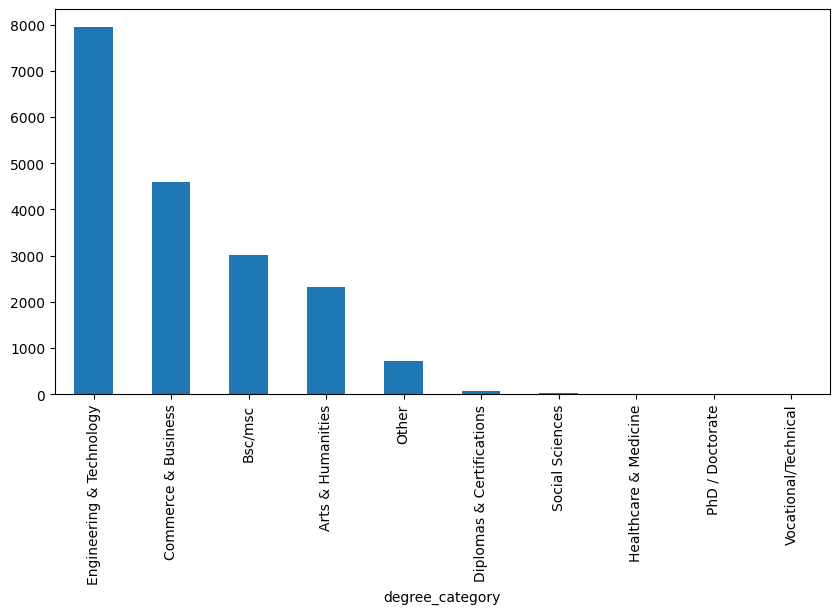

In [124]:
text_df['degree_category'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.show()

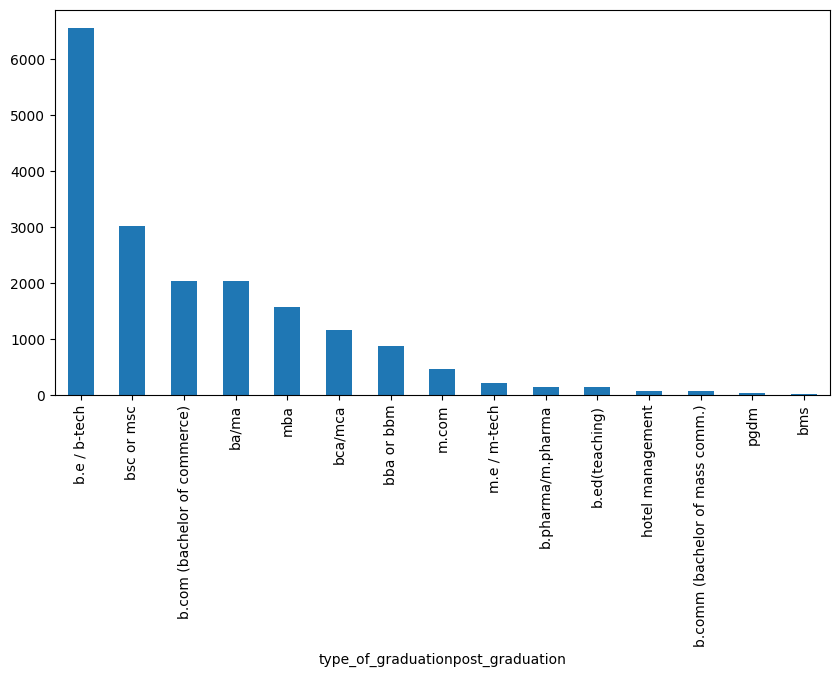

In [125]:
text_df['type_of_graduationpost_graduation'].value_counts().head(15).plot(kind='bar', figsize=(10,5))
plt.show()

In [126]:
text_df

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview,degree_category
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...,Engineering & Technology
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...,Bsc/msc
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...,Engineering & Technology
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...,Engineering & Technology
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1...",Arts & Humanities
...,...,...,...,...,...,...,...,...,...,...
18676,bsc or msc,sales numbers,"Introduction (Self Intro,Company Name), Purpos...",Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Non chargeable session,Ghaziabad,select\ncs ghaziabad,Comfortable with the stipend & allowances duri...,Bsc/msc
18677,b.e / b-tech,working hours,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency by creating counse...",Decision Making: Major decision of child futur...,"Non chargeable session, Value creation(Nothing...",Chandigarh,good candidate || cs chandigarh or panchkula o...,Not Interviewed in Byjus in sales role in last...,Engineering & Technology
18678,b.arc,sales numbers,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,Value creation(Nothing comes for free),Bangalore,"31,barc(2014), married, having exp as an sales...",Not Rehire (CDT have not joined byjus in sales...,Other
18679,b.e / b-tech,networking,"Introduction (Self Intro,Company Name), Purpos...",Urgency using situation,Asking questions:,Value creation(Nothing comes for free),Kannur,25yrs// father is privare employee// mother is...,Not Rehire (CDT have not joined byjus in sales...,Engineering & Technology


In [127]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 10 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   type_of_graduationpost_graduation                       18681 non-null  object
 1   experienced_candidate_(nature_of_work)                  18681 non-null  object
 2   callpitch_elements_used_during_the_call_sales_scenario  18681 non-null  object
 3   father_reply                                            18681 non-null  object
 4   let_me_discuss_it_with_my_child                         18681 non-null  object
 5   being_in_education_industry_be_selling_the_app          18681 non-null  object
 6   role_location_to_be_given_to_the_candidate              18681 non-null  object
 7   comments                                                18681 non-null  object
 8   redflags_comments_in_interview                

In [128]:
text_df.columns

Index(['type_of_graduationpost_graduation',
       'experienced_candidate_(nature_of_work)',
       'callpitch_elements_used_during_the_call_sales_scenario',
       'father_reply', 'let_me_discuss_it_with_my_child',
       'being_in_education_industry_be_selling_the_app',
       'role_location_to_be_given_to_the_candidate', 'comments',
       'redflags_comments_in_interview', 'degree_category'],
      dtype='object')

In [129]:
# Define the columns to use for creating 'meta_tag'
custom_object_tag = [
    #'type_of_graduationpost_graduation',
    'experienced_candidate_(nature_of_work)',
    #'callpitch_elements_used_during_the_call_sales_scenario',
    #'father_reply',
    #'let_me_discuss_it_with_my_child',
    #'being_in_education_industry_be_selling_the_app',
    'role_location_to_be_given_to_the_candidate',
    'comments',
    'redflags_comments_in_interview',
    #'degree_category'
]

# Create the 'meta_tag' column by concatenating selected columns
text_df['meta_tag'] = text_df[custom_object_tag].fillna('').astype(str).agg(' | '.join, axis=1)


In [130]:
text_df['degree_category'].value_counts()#####################################################

degree_category
Engineering & Technology     7942
Commerce & Business          4596
Bsc/msc                      3022
Arts & Humanities            2320
Other                         707
Diplomas & Certifications      62
Social Sciences                15
Healthcare & Medicine           9
PhD / Doctorate                 4
Vocational/Technical            4
Name: count, dtype: int64

In [131]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
text_df['degree_category'] = encoder.fit_transform(text_df['degree_category'])

In [132]:
text_df['experienced_candidate_(nature_of_work)'].value_counts().head(20)

experienced_candidate_(nature_of_work)
fresher(<6 months)                                          12070
sales numbers                                                1946
working hours                                                 749
call time                                                     286
no targets                                                    187
customer visits                                               170
teaching                                                      129
no targets                                                    119
call time, sales numbers, customer visits, working hours      102
sales numbers, customer visits                                 99
call time, sales numbers                                       78
non target                                                     76
operations                                                     58
core                                                           58
teaching                             

In [133]:
text_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 11 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   type_of_graduationpost_graduation                       18681 non-null  object
 1   experienced_candidate_(nature_of_work)                  18681 non-null  object
 2   callpitch_elements_used_during_the_call_sales_scenario  18681 non-null  object
 3   father_reply                                            18681 non-null  object
 4   let_me_discuss_it_with_my_child                         18681 non-null  object
 5   being_in_education_industry_be_selling_the_app          18681 non-null  object
 6   role_location_to_be_given_to_the_candidate              18681 non-null  object
 7   comments                                                18681 non-null  object
 8   redflags_comments_in_interview                

In [134]:
# def count_unique_values(df):
#     unique_counts = {}
#     for col in df.columns:
#         unique_counts[col] = df[col].nunique()
#     return unique_counts

# # Call the function
# unique_counts_dict = count_unique_values(text_df)

# # Display unique counts for each column
# for col, count in unique_counts_dict.items():
#     print(f"Column: {col}, Unique Values: {count}")


In [135]:
# def count_unique_values(df):
#     unique_counts = {}
#     for col in df.columns:
#         unique_counts[col] = df[col].value_counts().head(10)
#     return unique_counts

# # Call the function
# unique_counts_dict = count_unique_values(text_df)

# # Display unique counts for each column
# for col, count in unique_counts_dict.items():
#     print(f"Column: {col}, Unique Values: {count}")
#     print()
#     print()

In [136]:
text_df.head(5)

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview,degree_category,meta_tag
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...,4,tech | Bangalore | lipsa is 25 female from ori...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...,1,fresher(<6 months) | Delhi | 29 yo / female /...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...,4,fresher(<6 months) | Chennai | nm | Not worki...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...,4,fresher(<6 months) | Delhi | final interview ...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1...",0,fresher(<6 months) | Bangalore | aniket is 22 ...


In [137]:
text_df.loc[1, 'meta_tag']

"fresher(<6 months) | Delhi  | 29 yo / female / unmarried / msc finance uk 2022 / recently relocated to india just 20 days ago / odissa / father - doctor / bro - software engineer / pursuing internship in investment banking - ends in next week / worked as a teacher / good story teller - fluent in hindi and english - good energy / also prepared for upsc and gmat - purchased a course from byju's earlier / cracked gmat and got business school as well/asking ques in sales scenario - 2/5 | Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training, Not working currently and ready to join the R3 Process"

In [138]:
text_df.loc[0, 'meta_tag']

'tech | Bangalore | lipsa is 25 female from orissa, family bg - father - govt employee, mother - hw, currently residing in u.k - university of shephard - masters in data science exams over waiting for results, scenario - taking gaps engagement fine countering, overall avg one only from foreign university exams not done, skillset not upto mark, too hesitent abt stipend// reject | At least Graduated ( not 12th Pass or diploma or Final Year student)'

In [139]:
text_df.loc[2, 'meta_tag']

'fresher(<6 months) | Chennai  | nm | Not working currently and ready to join the R3 Process'

In [140]:
text_df.loc[3, 'meta_tag']

'fresher(<6 months) | Delhi  | final interview done  22yrs //uttarakhand // father is ex- navy employee// mother is housewife//2022 btech eee pass out // fresher // no-acquittance // performed well in extempore and ss //not interested in govt sector // as cdt performed well decent in hindi & english as well// empahtic yes -role acceptance// as cdt discussed with his father regarding this as well// 22nd nov //\n | Not Rehire (CDT have not joined byjus in sales before), Not Interviewed in Byjus in sales role in last 90days, Laptop and WiFi are Available, Age is below 32.11, At least Graduated ( not 12th Pass or diploma or Final Year student), Willing to relocate at given location for SSP, Comfortable with the stipend & allowances during training, Not working currently and ready to join the R3 Process'

In [141]:
import spacy
spacy.prefer_gpu()

nlp = spacy.load("en_core_web_sm")

def clean_text_pipe(texts):
    return [
        " ".join([token.lemma_ for token in doc if not token.is_stop and token.is_alpha])
        for doc in nlp.pipe(texts, batch_size=100)
    ]

text_df['meta_tag_cleaned'] = clean_text_pipe(text_df['meta_tag'].astype(str))

In [142]:
text_df['meta_tag_cleaned']

0        tech Bangalore lipsa female orissa family bg f...
1        month Delhi yo female unmarried msc finance uk...
2        month Chennai nm work currently ready join pro...
3        month Delhi final interview father navy mother...
4        month Bangalore aniket male bhopal ba grad fam...
                               ...                        
18676    sale number Ghaziabad select cs ghaziabad Comf...
18677    work hour Chandigarh good candidate cs chandig...
18678    sale number Bangalore marry have exp sale tech...
18679    network Kannur father privare mother house wif...
18680    sale number Bangalore yo male married mba kott...
Name: meta_tag_cleaned, Length: 18681, dtype: object

In [143]:
text_df.loc[0, 'meta_tag_cleaned']

'tech Bangalore lipsa female orissa family bg father govt employee mother hw currently reside university shephard master datum science exam wait result scenario take gap engagement fine countering overall avg foreign university exam skillset upto mark hesitent abt reject Graduated Pass diploma Final Year student'

In [144]:
text_df.loc[1, 'meta_tag_cleaned']

'month Delhi yo female unmarried msc finance uk recently relocate india day ago odissa father doctor bro software engineer pursue internship investment banking end week work teacher good story teller fluent hindi english good energy prepare upsc gmat purchase course byju early crack gmat get business school ask que sale scenario Rehire CDT join byju sale interview Byjus sale role Laptop WiFi available Age Graduated Pass diploma Final Year student willing relocate give location SSP comfortable stipend allowance training work currently ready join process'

In [145]:
text_df.loc[2, 'meta_tag_cleaned']

'month Chennai nm work currently ready join process'

In [146]:
text_df.loc[3, 'meta_tag_cleaned']

'month Delhi final interview father navy mother btech eee pass fresher acquittance perform extempore ss interested govt sector cdt perform decent hindi english empahtic yes cdt discuss father nov Rehire CDT join byju sale interview Byjus sale role Laptop WiFi available Age Graduated Pass diploma Final Year student willing relocate give location SSP comfortable stipend allowance training work currently ready join process'

In [147]:
# from sklearn.preprocessing import LabelEncoder
# categorical_cols = ["meta_tag_cleaned"]

# # Encode categorical columns
# label_encoders = {}
# for col in categorical_cols:
#     le = LabelEncoder()
#     text_df[col] = le.fit_transform(text_df[col])  # Convert text to numbers
#     label_encoders[col] = le  # Store encoders for inverse transformation if needed

In [148]:
text_df

,type_of_graduationpost_graduation,experienced_candidate_(nature_of_work),callpitch_elements_used_during_the_call_sales_scenario,father_reply,let_me_discuss_it_with_my_child,being_in_education_industry_be_selling_the_app,role_location_to_be_given_to_the_candidate,comments,redflags_comments_in_interview,degree_category,meta_tag,meta_tag_cleaned
0,masters in data science,tech,Purpose of Call (Book a Counselling Session),Urgency using Time,None of the above,None of the above,Bangalore,"lipsa is 25 female from orissa, family bg - fa...",At least Graduated ( not 12th Pass or diploma ...,4,tech | Bangalore | lipsa is 25 female from ori...,tech Bangalore lipsa female orissa family bg f...
1,bsc or msc,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...",Asking Questions,None of the above,Non chargeable session,Delhi,29 yo / female / unmarried / msc finance uk 20...,Not Rehire (CDT have not joined byjus in sales...,1,fresher(<6 months) | Delhi | 29 yo / female /...,month Delhi yo female unmarried msc finance uk...
2,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name)",Urgency using Time,Decision Making: Major decision of child futur...,Non chargeable session,Chennai,nm,Not working currently and ready to join the R3...,4,fresher(<6 months) | Chennai | nm | Not worki...,month Chennai nm work currently ready join pro...
3,b.e / b-tech,fresher(<6 months),"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency using situation",None of the above,Value creation(Nothing comes for free),Delhi,final interview done 22yrs //uttarakhand // f...,Not Rehire (CDT have not joined byjus in sales...,4,fresher(<6 months) | Delhi | final interview ...,month Delhi final interview father navy mother...
4,ba/ma,fresher(<6 months),None of the Above,Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Value creation(Nothing comes for free),Bangalore,"aniket is 22 male from bhopal, ba grad 21, fam...","Age is below 32.11, At least Graduated ( not 1...",0,fresher(<6 months) | Bangalore | aniket is 22 ...,month Bangalore aniket male bhopal ba grad fam...
...,...,...,...,...,...,...,...,...,...,...,...,...
18676,bsc or msc,sales numbers,"Introduction (Self Intro,Company Name), Purpos...",Urgency by creating counsellor Hype,Anticipation of objection from child's end:,Non chargeable session,Ghaziabad,select\ncs ghaziabad,Comfortable with the stipend & allowances duri...,1,sales numbers | Ghaziabad | select\ncs ghazia...,sale number Ghaziabad select cs ghaziabad Comf...
18677,b.e / b-tech,working hours,"Introduction (Self Intro,Company Name), Purpos...","Urgency using Time, Urgency by creating counse...",Decision Making: Major decision of child futur...,"Non chargeable session, Value creation(Nothing...",Chandigarh,good candidate || cs chandigarh or panchkula o...,Not Interviewed in Byjus in sales role in last...,4,working hours | Chandigarh | good candidate |...,work hour Chandigarh good candidate cs chandig...
18678,b.arc,sales numbers,"Introduction (Self Intro,Company Name), Need G...",Urgency using situation,Decision Making: Major decision of child futur...,Value creation(Nothing comes for free),Bangalore,"31,barc(2014), married, having exp as an sales...",Not Rehire (CDT have not joined byjus in sales...,6,"sales numbers | Bangalore | 31,barc(2014), mar...",sale number Bangalore marry have exp sale tech...
18679,b.e / b-tech,networking,"Introduction (Self Intro,Company Name), Purpos...",Urgency using situation,Asking questions:,Value creation(Nothing comes for free),Kannur,25yrs// father is privare employee// mother is...,Not Rehire (CDT have not joined byjus in sales...,4,networking | Kannur | 25yrs// father is priva...,network Kannur father privare mother house wif...


In [149]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
text_df['meta_tag_encoded'] = encoder.fit_transform(text_df['meta_tag_cleaned'])

In [150]:
text_df['meta_tag_encoded']

0        16960
1         8519
2         5673
3         7160
4         2007
         ...  
18676    15232
18677    17940
18678    14368
18679    13468
18680    14465
Name: meta_tag_encoded, Length: 18681, dtype: int64

In [151]:
num_df.shape

(18681, 38)

In [152]:
num_df = num_df.join(text_df[['degree_category', 'meta_tag_encoded']])
num_df.shape

(18681, 40)

In [153]:
num_df.head()

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded
0,3,1,3,0,0,5,0,1,0,5,...,1,0,1,0,0,0,0,1,4,16960
1,4,1,3,0,0,0,0,0,0,2,...,1,0,0,0,1,1,0,0,1,8519
2,3,1,3,1,1,0,1,0,1,4,...,1,0,0,1,0,1,0,0,4,5673
3,2,0,3,0,0,0,0,0,0,4,...,0,0,0,1,0,1,0,0,4,7160
4,2,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,2007


In [154]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   age                                                                                18681 non-null  int64
 1   gender                                                                             18681 non-null  int64
 2   fluency_in_english_based_on_introduction                                           18681 non-null  int64
 3   mother_tongue_influence                                                            18681 non-null  int64
 4   has_acquaintance_in_company                                                        18681 non-null  int64
 5   last_fixed_ctc_(lakhs)                                                             18681 non-null  int64
 6   curren

In [155]:
num_df

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded
0,3,1,3,0,0,5,0,1,0,5,...,1,0,1,0,0,0,0,1,4,16960
1,4,1,3,0,0,0,0,0,0,2,...,1,0,0,0,1,1,0,0,1,8519
2,3,1,3,1,1,0,1,0,1,4,...,1,0,0,1,0,1,0,0,4,5673
3,2,0,3,0,0,0,0,0,0,4,...,0,0,0,1,0,1,0,0,4,7160
4,2,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18676,4,0,3,0,0,3,0,4,1,0,...,1,1,0,0,0,1,0,0,1,15232
18677,3,0,1,0,0,7,1,6,2,3,...,1,1,0,0,0,1,0,0,4,17940
18678,5,0,3,0,0,7,0,7,1,5,...,0,1,0,0,0,1,0,0,6,14368
18679,3,0,3,0,0,2,0,2,1,3,...,1,0,1,0,0,1,0,0,4,13468


In [156]:
num_df.isnull().sum()

age                                                                                  0
gender                                                                               0
fluency_in_english_based_on_introduction                                             0
mother_tongue_influence                                                              0
has_acquaintance_in_company                                                          0
last_fixed_ctc_(lakhs)                                                               0
currently_employed                                                                   0
experienced_candidate__(experience_in_months)                                        0
what_was_the_type_of_role                                                            0
how_many_slides_candidate_have_submitted_in_ppt                                      0
interview_verdict                                                                    0
candidate_is_willing_to_relocate           

In [157]:
num_df.shape

(18681, 40)

In [158]:
num_df.to_csv("num_df.csv", index=False)

In [159]:
from IPython.display import FileLink

FileLink("/kaggle/working/num_df.csv")


/kaggle/working/num_df.csv

In [160]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18681 entries, 0 to 18680
Data columns (total 40 columns):
 #   Column                                                                             Non-Null Count  Dtype
---  ------                                                                             --------------  -----
 0   age                                                                                18681 non-null  int64
 1   gender                                                                             18681 non-null  int64
 2   fluency_in_english_based_on_introduction                                           18681 non-null  int64
 3   mother_tongue_influence                                                            18681 non-null  int64
 4   has_acquaintance_in_company                                                        18681 non-null  int64
 5   last_fixed_ctc_(lakhs)                                                             18681 non-null  int64
 6   curren

In [161]:
num_df.isnull().sum()

age                                                                                  0
gender                                                                               0
fluency_in_english_based_on_introduction                                             0
mother_tongue_influence                                                              0
has_acquaintance_in_company                                                          0
last_fixed_ctc_(lakhs)                                                               0
currently_employed                                                                   0
experienced_candidate__(experience_in_months)                                        0
what_was_the_type_of_role                                                            0
how_many_slides_candidate_have_submitted_in_ppt                                      0
interview_verdict                                                                    0
candidate_is_willing_to_relocate           

In [162]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_df_scaled = scaler.fit_transform(num_df)  # Returns a NumPy array

num_df_scaled = pd.DataFrame(scaler.fit_transform(num_df), columns=num_df.columns, index=num_df.index)


In [163]:
num_df_scaled.describe()  # Check mean ~0 and std ~1

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,mode_of_interview_given_by_candidate_Mobile,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded
count,1.868100e+04,18681.000000,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,...,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04,1.868100e+04
mean,-4.564270e-18,0.000000,7.835330e-17,6.085693e-18,1.825708e-17,2.053922e-17,3.347131e-17,3.499274e-17,2.966776e-17,2.434277e-17,...,-5.172839e-17,1.901779e-18,3.651416e-17,9.128540e-18,-1.521423e-18,-8.215686e-17,1.825708e-17,-5.933551e-17,-1.350263e-16,1.658351e-16
std,1.000027e+00,1.000027,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,...,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00,1.000027e+00
min,-1.538984e+00,-0.506749,-1.566748e+00,-5.441705e-01,-3.470364e-01,-6.489916e-01,-4.166258e-01,-5.890097e-01,-7.111922e-01,-2.099703e+00,...,-1.739064e+00,-4.741550e-01,-4.393041e-01,-9.227335e-01,-4.918563e-01,-1.414554e+00,-2.045165e-01,-6.438822e-01,-1.598628e+00,-1.733288e+00
25%,-4.637443e-01,-0.506749,-6.533659e-01,-5.441705e-01,-3.470364e-01,-6.489916e-01,-4.166258e-01,-5.890097e-01,-7.111922e-01,-1.601499e-01,...,5.750220e-01,-4.741550e-01,-4.393041e-01,-9.227335e-01,-4.918563e-01,-1.414554e+00,-2.045165e-01,-6.438822e-01,-9.846356e-01,-8.678055e-01
50%,-4.637443e-01,-0.506749,-6.533659e-01,-5.441705e-01,-3.470364e-01,-6.489916e-01,-4.166258e-01,-5.890097e-01,-7.111922e-01,-1.601499e-01,...,5.750220e-01,-4.741550e-01,-4.393041e-01,-9.227335e-01,-4.918563e-01,7.069365e-01,-2.045165e-01,-6.438822e-01,-3.706434e-01,-4.947490e-03
75%,6.114956e-01,-0.506749,1.173399e+00,-5.441705e-01,-3.470364e-01,8.301533e-01,-4.166258e-01,3.160522e-01,9.956142e-01,8.096267e-01,...,5.750220e-01,-4.741550e-01,-4.393041e-01,1.083737e+00,-4.918563e-01,7.069365e-01,-2.045165e-01,1.553079e+00,8.573410e-01,8.646604e-01
max,2.761975e+00,1.973362,1.173399e+00,1.837659e+00,2.881542e+00,4.528016e+00,2.400235e+00,2.578707e+00,2.702421e+00,2.749180e+00,...,5.750220e-01,2.109015e+00,2.276328e+00,1.083737e+00,2.033114e+00,7.069365e-01,4.889581e+00,1.553079e+00,3.927302e+00,1.737831e+00


In [164]:
num_df_scaled = num_df_scaled.join(df[['whether_joined_the_company_or_not']])
num_df_scaled.shape

(18681, 41)

In [165]:
num_df_scaled.head(10)

,age,gender,fluency_in_english_based_on_introduction,mother_tongue_influence,has_acquaintance_in_company,last_fixed_ctc_(lakhs),currently_employed,experienced_candidate__(experience_in_months),what_was_the_type_of_role,how_many_slides_candidate_have_submitted_in_ppt,...,candidate_status_Experienced in client facing(equal to or more than 6 months),candidate_status_Experienced in non client facing(equal to or more than 6 months),candidate_status_Fresher(only 2022 grad),candidate_status_Lateral(2021 and before with (less than 6 months) experience),role_acceptance_Emphatic Yes,role_acceptance_No,role_acceptance_Yes : Think and says yes.(Shows some hesitation),degree_category,meta_tag_encoded,whether_joined_the_company_or_not
0,0.611496,1.973362,1.173399,-0.544171,-0.347036,3.048871,-0.416626,-0.136479,-0.711192,2.749180,...,-0.474155,2.276328,-0.922733,-0.491856,-1.414554,-0.204517,1.553079,0.857341,1.446649,0
1,1.686735,1.973362,1.173399,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-0.160150,...,-0.474155,-0.439304,-0.922733,2.033114,0.706936,-0.204517,-0.643882,-0.984636,-0.136007,0
2,0.611496,1.973362,1.173399,1.837659,2.881542,-0.648992,2.400235,-0.589010,0.995614,1.779403,...,-0.474155,-0.439304,1.083737,-0.491856,0.706936,-0.204517,-0.643882,0.857341,-0.669622,1
3,-0.463744,-0.506749,1.173399,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,1.779403,...,-0.474155,-0.439304,1.083737,-0.491856,0.706936,-0.204517,-0.643882,0.857341,-0.390815,1
4,-0.463744,-0.506749,-0.653366,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-1.129927,...,-0.474155,-0.439304,1.083737,-0.491856,-1.414554,-0.204517,1.553079,-1.598628,-1.356983,0
5,-0.463744,-0.506749,-1.566748,-0.544171,-0.347036,0.830153,-0.416626,-0.589010,-0.711192,-2.099703,...,-0.474155,-0.439304,-0.922733,2.033114,-1.414554,-0.204517,1.553079,-1.598628,-0.340753,0
6,-0.463744,1.973362,1.173399,-0.544171,2.881542,-0.648992,-0.416626,-0.589010,-0.711192,-0.160150,...,-0.474155,-0.439304,-0.922733,2.033114,0.706936,-0.204517,-0.643882,2.085325,-1.266985,0
7,0.611496,-0.506749,-1.566748,-0.544171,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-0.160150,...,-0.474155,-0.439304,1.083737,-0.491856,-1.414554,-0.204517,1.553079,0.857341,-1.108551,1
8,-0.463744,-0.506749,-0.653366,1.837659,-0.347036,-0.648992,-0.416626,-0.589010,-0.711192,-2.099703,...,-0.474155,-0.439304,-0.922733,2.033114,0.706936,-0.204517,-0.643882,0.857341,-0.310191,1
9,0.611496,-0.506749,-0.653366,-0.544171,-0.347036,1.569726,-0.416626,0.316052,0.995614,0.809627,...,2.109015,-0.439304,-0.922733,-0.491856,0.706936,-0.204517,-0.643882,-0.370643,0.937221,1


# Accuracy checking 

In [166]:
from sklearn.model_selection import train_test_split

# Define Features and Target
X = num_df_scaled.drop(columns=['whether_joined_the_company_or_not'])
y = num_df_scaled['whether_joined_the_company_or_not']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [167]:
len(X), len(y), len(X_train), len(y_train), len(X_test), len(y_test)

(18681, 18681, 14944, 14944, 3737, 3737)

In [168]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report

# # Train Model
# clf = RandomForestClassifier(n_estimators=100, random_state=42)
# clf.fit(X_train, y_train)

# # Predictions
# y_pred = clf.predict(X_test)

In [169]:
# # Accuracy
# print("Accuracy:", accuracy_score(y_test, y_pred)*100)

# # Classification Report
# print(classification_report(y_test, y_pred))


In [170]:
# import matplotlib.pyplot as plt
# import numpy as np

# feature_importance = clf.feature_importances_
# sorted_idx = np.argsort(feature_importance)[::-1]
# plt.figure(figsize=(12, 6))
# plt.barh(X.columns[sorted_idx][:40], feature_importance[sorted_idx][:40])
# plt.xlabel("Feature Importance")
# plt.title("Top 15 Most Important Features")
# plt.gca().invert_yaxis()
# plt.show()


In [171]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=200, learning_rate=0.05, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


from sklearn.metrics import accuracy_score
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb)*100)

XGBoost Accuracy: 54.080813486754074


In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression model
log_reg = LogisticRegression(random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)


In [173]:
# Print Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log)*100)

# Print Classification Report
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 53.652662563553655
              precision    recall  f1-score   support

           0       0.56      0.52      0.54      1952
           1       0.51      0.55      0.53      1785

    accuracy                           0.54      3737
   macro avg       0.54      0.54      0.54      3737
weighted avg       0.54      0.54      0.54      3737



In [174]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout to prevent overfitting
    Dense(64, activation='relu'),  # Second hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Third hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=50, batch_size=32, 
                    validation_data=(X_test, y_test), 
                    verbose=1)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5210 - loss: 0.7061 - val_accuracy: 0.5186 - val_loss: 0.6784
Epoch 2/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5284 - loss: 0.6822 - val_accuracy: 0.5205 - val_loss: 0.6721
Epoch 3/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5359 - loss: 0.6718 - val_accuracy: 0.5440 - val_loss: 0.6665
Epoch 4/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5403 - loss: 0.6678 - val_accuracy: 0.5352 - val_loss: 0.6654
Epoch 5/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5528 - loss: 0.6621 - val_accuracy: 0.5301 - val_loss: 0.6642
Epoch 6/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5486 - loss: 0.6590 - val_accuracy: 0.5373 - val_loss: 0.6627
Epoch 7/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5449 - loss: 0.6597 - val_accuracy: 0.5341 - val_loss: 0.6622
Epoch 8/50
467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5573 - loss: 0.6567 - val_accuracy: 0.

In [175]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [176]:
# Define Features and Target
X = num_df_scaled.drop(columns=['whether_joined_the_company_or_not'])
y = num_df_scaled['whether_joined_the_company_or_not']

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)  # ✅ Correct way
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)  

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)


# Create DataLoader for batching
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [177]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # First layer
        self.fc2 = nn.Linear(128, 64)  # Second layer
        self.fc3 = nn.Linear(64, 32)  # Third layer
        self.fc4 = nn.Linear(32, 2)  # Output layer (binary classification)

        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)  # Dropout to prevent overfitting
        self.softmax = nn.Softmax(dim=1)  # Softmax for output

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.fc4(x)  # No activation for last layer (CrossEntropyLoss expects raw logits)
        return x

In [178]:
model

<Sequential name=sequential, built=True>

In [179]:
# Initialize model
input_size = X_train.shape[1]  # Number of features
model = MLP(input_size)

# Define Loss and Optimizer
criterion = nn.CrossEntropyLoss()  # For classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training Loop
epochs = 50
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {total_loss/len(train_loader):.4f}")


Epoch 1/50, Loss: 0.6834
Epoch 2/50, Loss: 0.6711
Epoch 3/50, Loss: 0.6640
Epoch 4/50, Loss: 0.6613
Epoch 5/50, Loss: 0.6582
Epoch 6/50, Loss: 0.6568
Epoch 7/50, Loss: 0.6553
Epoch 8/50, Loss: 0.6559
Epoch 9/50, Loss: 0.6539
Epoch 10/50, Loss: 0.6539
Epoch 11/50, Loss: 0.6527
Epoch 12/50, Loss: 0.6529
Epoch 13/50, Loss: 0.6530
Epoch 14/50, Loss: 0.6512
Epoch 15/50, Loss: 0.6503
Epoch 16/50, Loss: 0.6491
Epoch 17/50, Loss: 0.6492
Epoch 18/50, Loss: 0.6470
Epoch 19/50, Loss: 0.6458
Epoch 20/50, Loss: 0.6451
Epoch 21/50, Loss: 0.6434
Epoch 22/50, Loss: 0.6426
Epoch 23/50, Loss: 0.6425
Epoch 24/50, Loss: 0.6421
Epoch 25/50, Loss: 0.6410
Epoch 26/50, Loss: 0.6395
Epoch 27/50, Loss: 0.6405
Epoch 28/50, Loss: 0.6390
Epoch 29/50, Loss: 0.6394
Epoch 30/50, Loss: 0.6363
Epoch 31/50, Loss: 0.6361
Epoch 32/50, Loss: 0.6352
Epoch 33/50, Loss: 0.6344
Epoch 34/50, Loss: 0.6339
Epoch 35/50, Loss: 0.6313
Epoch 36/50, Loss: 0.6327
Epoch 37/50, Loss: 0.6310
Epoch 38/50, Loss: 0.6279
Epoch 39/50, Loss: 0.

In [180]:
from sklearn.metrics import accuracy_score

model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(y_batch.tolist())
        y_pred.extend(predicted.tolist())

accuracy = accuracy_score(y_true, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 52.42%


In [181]:
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)  # Increase neurons
        self.bn1 = nn.BatchNorm1d(128)  # Batch Normalization
        self.dropout1 = nn.Dropout(0.3)

        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(0.3)

        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(0.2)

        self.fc4 = nn.Linear(32, 2)  # Output for binary classification

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)

        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)

        x = torch.relu(self.bn3(self.fc3(x)))
        x = self.dropout3(x)

        return self.fc4(x)  # No activation (CrossEntropyLoss includes Softmax)


In [182]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

In [183]:
print(y.value_counts(normalize=True))


whether_joined_the_company_or_not
0    0.522456
1    0.477544
Name: proportion, dtype: float64


In [184]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the training function
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()  # Set model to training mode
    running_loss = 0.0
    
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)  # Move to GPU if available

        optimizer.zero_grad()  # Reset gradients
        outputs = model(inputs)  
        
        loss = criterion(outputs, targets)  
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item()
    
    return running_loss / len(train_loader)  # Return average loss

In [185]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=X_train_tensor.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()  # Since it's a classification problem
optimizer = optim.Adam(model.parameters(), lr=0.001)

best_loss = float('inf')

for epoch in range(50):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    
    if train_loss < best_loss:
        best_loss = train_loss
        torch.save(model.state_dict(), "best_model.pth")  # Save best model
    
    print(f"Epoch {epoch+1}/100, Loss: {train_loss:.4f}")


Epoch 1/100, Loss: 0.6986
Epoch 2/100, Loss: 0.6814
Epoch 3/100, Loss: 0.6763
Epoch 4/100, Loss: 0.6746
Epoch 5/100, Loss: 0.6719
Epoch 6/100, Loss: 0.6715
Epoch 7/100, Loss: 0.6685
Epoch 8/100, Loss: 0.6680
Epoch 9/100, Loss: 0.6664
Epoch 10/100, Loss: 0.6654
Epoch 11/100, Loss: 0.6631
Epoch 12/100, Loss: 0.6631
Epoch 13/100, Loss: 0.6610
Epoch 14/100, Loss: 0.6614
Epoch 15/100, Loss: 0.6602
Epoch 16/100, Loss: 0.6594
Epoch 17/100, Loss: 0.6599
Epoch 18/100, Loss: 0.6577
Epoch 19/100, Loss: 0.6592
Epoch 20/100, Loss: 0.6567
Epoch 21/100, Loss: 0.6554
Epoch 22/100, Loss: 0.6569
Epoch 23/100, Loss: 0.6544
Epoch 24/100, Loss: 0.6535
Epoch 25/100, Loss: 0.6543
Epoch 26/100, Loss: 0.6515
Epoch 27/100, Loss: 0.6506
Epoch 28/100, Loss: 0.6537
Epoch 29/100, Loss: 0.6501
Epoch 30/100, Loss: 0.6489
Epoch 31/100, Loss: 0.6479
Epoch 32/100, Loss: 0.6487
Epoch 33/100, Loss: 0.6478
Epoch 34/100, Loss: 0.6484
Epoch 35/100, Loss: 0.6470
Epoch 36/100, Loss: 0.6473
Epoch 37/100, Loss: 0.6453
Epoch 38/1

In [186]:
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_size=X_train_tensor.shape[1]).to(device)
criterion = nn.CrossEntropyLoss()  # Since it's a classification problem
optimizer = optim.Adam(model.parameters(), lr=0.005)

best_loss = float('inf')
losses = []

for epoch in range(50):
    train_loss = train_one_epoch(model, train_loader, criterion, optimizer, device)
    losses.append(train_loss)  # Store the loss
    
    if train_loss < best_loss:
        best_loss = train_loss
        # torch.save(model.state_dict(), "best_model.pth")  # Save best model
    
    print(f"Epoch {epoch+1}/100, Loss: {train_loss:.4f}")


Epoch 1/100, Loss: 0.6887
Epoch 2/100, Loss: 0.6754
Epoch 3/100, Loss: 0.6701
Epoch 4/100, Loss: 0.6658
Epoch 5/100, Loss: 0.6642
Epoch 6/100, Loss: 0.6650
Epoch 7/100, Loss: 0.6626
Epoch 8/100, Loss: 0.6624
Epoch 9/100, Loss: 0.6613
Epoch 10/100, Loss: 0.6616
Epoch 11/100, Loss: 0.6613
Epoch 12/100, Loss: 0.6588
Epoch 13/100, Loss: 0.6591
Epoch 14/100, Loss: 0.6584
Epoch 15/100, Loss: 0.6582
Epoch 16/100, Loss: 0.6582
Epoch 17/100, Loss: 0.6567
Epoch 18/100, Loss: 0.6577
Epoch 19/100, Loss: 0.6566
Epoch 20/100, Loss: 0.6565
Epoch 21/100, Loss: 0.6557
Epoch 22/100, Loss: 0.6554
Epoch 23/100, Loss: 0.6545
Epoch 24/100, Loss: 0.6542
Epoch 25/100, Loss: 0.6566
Epoch 26/100, Loss: 0.6533
Epoch 27/100, Loss: 0.6556
Epoch 28/100, Loss: 0.6533
Epoch 29/100, Loss: 0.6519
Epoch 30/100, Loss: 0.6517
Epoch 31/100, Loss: 0.6532
Epoch 32/100, Loss: 0.6526
Epoch 33/100, Loss: 0.6513
Epoch 34/100, Loss: 0.6493
Epoch 35/100, Loss: 0.6480
Epoch 36/100, Loss: 0.6465
Epoch 37/100, Loss: 0.6487
Epoch 38/1

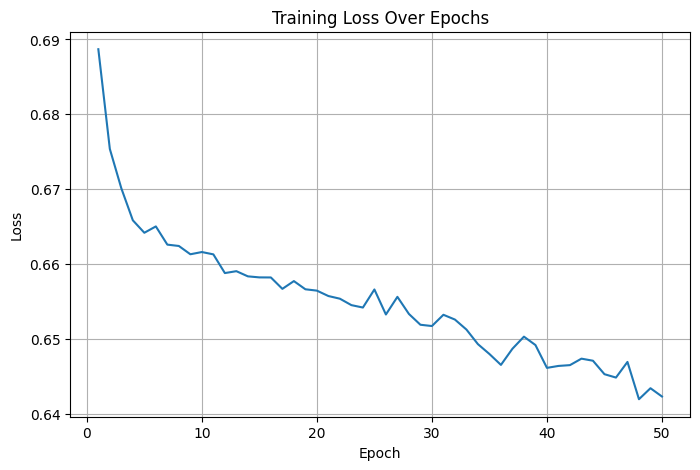

In [187]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.grid(True)
plt.show()